In [1]:
import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn.preprocessing as preprocessing
import sklearn.model_selection as model_selection
import fraudutils as futils

Using TensorFlow backend.


In [2]:
train, test, val = futils.load_train_test_val_dataset('../../../data/processed/give-me-some-credit/')

X_train = train.drop(['SeriousDlqin2yrs'], axis=1)
y_train = train['SeriousDlqin2yrs']

X_test = test.drop(['SeriousDlqin2yrs'], axis=1)
y_test = test['SeriousDlqin2yrs']

X_val = val.drop(['SeriousDlqin2yrs'], axis=1)
y_val = val['SeriousDlqin2yrs']

In [3]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(20, activation='relu', input_shape=(X_train.shape[1],)))
model.add(keras.layers.Dense(10, activation='relu'))
model.add(keras.layers.Dense(1, activation='relu'))
model.add(keras.layers.Dense(10, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='mse')

In [4]:
history = model.fit(X_train, X_train, batch_size=128, epochs=10, validation_data=(X_test, X_test))

Train on 90000 samples, validate on 45000 samples
Epoch 1/10
90000/90000 [==============================] - 2s 21us/step - loss: 0.0853 - val_loss: 0.0131
Epoch 2/10
90000/90000 [==============================] - 1s 15us/step - loss: 0.0037 - val_loss: 0.0026
Epoch 3/10
90000/90000 [==============================] - 1s 14us/step - loss: 0.0024 - val_loss: 0.0022
Epoch 4/10
90000/90000 [==============================] - 1s 13us/step - loss: 0.0020 - val_loss: 0.0018A: 0s - loss: 0
Epoch 5/10
90000/90000 [==============================] - 1s 15us/step - loss: 0.0016 - val_loss: 0.0016
Epoch 6/10
90000/90000 [==============================] - 1s 14us/step - loss: 0.0015 - val_loss: 0.0014
Epoch 7/10
90000/90000 [==============================] - 2s 24us/step - loss: 0.0014 - val_loss: 0.0013
Epoch 8/10
90000/90000 [==============================] - 1s 16us/step - loss: 0.0013 - val_loss: 0.0013
Epoch 9/10
90000/90000 [==============================] - 2s 18us/step - loss: 0.0012 - val_los

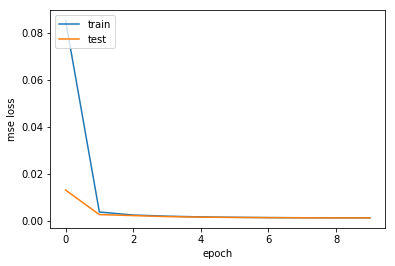

In [5]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('mse loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()